<a href="https://colab.research.google.com/github/RocioLiu/ML_Resources/blob/master/Geron10_Intro_to_ANN_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [0]:
X_train_full.shape

(60000, 28, 28)

In [0]:
X_train_full.dtype

dtype('uint8')

In [0]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [0]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [0]:
class_names[y_train[0]]

'Coat'

In [0]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [0]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation = 'relu'),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

In [0]:
model.layers
model.layers[1].name
#model.get_layer('dense_3').name

'dense_37'

In [0]:
weights, biases = model.layers[1].get_weights()
weights

array([[ 0.02477881,  0.04229561, -0.00342248, ...,  0.06429014,
         0.02262444,  0.01431789],
       [ 0.03983131, -0.01955886, -0.03482531, ..., -0.07401285,
        -0.06437729,  0.05052959],
       [ 0.01014944, -0.01792384,  0.00117691, ..., -0.06045827,
         0.06387194, -0.05821592],
       ...,
       [ 0.06278089, -0.0382911 , -0.06426618, ..., -0.02681522,
        -0.02872516,  0.02959321],
       [-0.0727238 ,  0.02013752, -0.07316693, ...,  0.06982808,
         0.05842887,  0.03142457],
       [-0.05274097, -0.04510197,  0.0629666 , ...,  0.03195143,
        -0.03372417, -0.01557451]], dtype=float32)

In [0]:
weights.shape

(784, 300)

In [0]:
biases[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [0]:
biaes.shape

(300,)

In [0]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [0]:
model_fit = model.fit(X_train, y_train, epochs = 30, validation_data = (X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 7s 129us/sample - loss: 0.7316 - acc: 0.7617 - val_loss: 0.5279 - val_acc: 0.8160
Epoch 2/30
55000/55000 [==============================] - 6s 106us/sample - loss: 0.4847 - acc: 0.8308 - val_loss: 0.4604 - val_acc: 0.8434
Epoch 3/30
55000/55000 [==============================] - 6s 101us/sample - loss: 0.4398 - acc: 0.8455 - val_loss: 0.4143 - val_acc: 0.8598
Epoch 4/30
55000/55000 [==============================] - 6s 103us/sample - loss: 0.4122 - acc: 0.8546 - val_loss: 0.3958 - val_acc: 0.8652
Epoch 5/30
55000/55000 [==============================] - 6s 104us/sample - loss: 0.3912 - acc: 0.8633 - val_loss: 0.3992 - val_acc: 0.8662
Epoch 6/30
55000/55000 [==============================] - 6s 102us/sample - loss: 0.3748 - acc: 0.8688 - val_loss: 0.3796 - val_acc: 0.8698
Epoch 7/30
55000/55000 [==============================] - 6s 107us/sample - loss: 0.3628 - acc: 0.8721 - val_lo

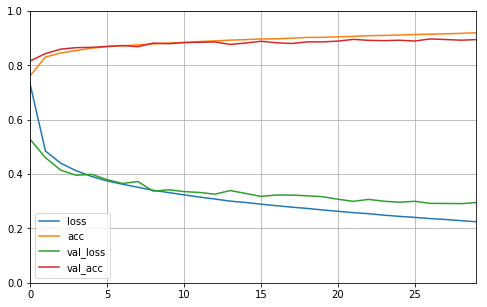

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(model_fit.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # plt.gca(): Get the current Axes instance on the current figure matching the given keyword args, or create one.
plt.show()

In [0]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 47us/sample - loss: 73.2167 - acc: 0.8323


[73.21669893188476, 0.8323]

In [0]:
# Using the Model to Make Predictions
# Since we don’t have actual new instances, we will just use the first 3 instances of the test set:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
# If you only care about the class with the highest estimated probability(even if that probability is quite low),
# then you can use the predict_classes() method instead:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1])

In [0]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [0]:
#  the classifier actually classified all three images correctly:
y_test[:3]

array([9, 2, 1], dtype=uint8)

### Building a Regression MLP Using the Sequential API

In [0]:
# use Scikit-Learn’s fetch_california_housing() function to load the data:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [0]:
housing = fetch_california_housing()

In [0]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [0]:
# StandardScaler(): Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)  # fit_transform:　Fit to data, then transform it.  So after this step, the scaler object has the mean and std attribute of X_train
X_valid_scaled = scaler.transform(X_valid) # Using the mean and std attribute of X_train to standardize X_valid
X_test_scaled = scaler.transform(X_test) # Using the mean and std attribute of X_train to standardize X_test
print(scaler.mean_)
print(np.mean(X_train[:,0]))

[ 3.87548230e+00  2.86049957e+01  5.42884824e+00  1.09711769e+00
  1.42862308e+03  3.12982994e+00  3.56278639e+01 -1.19560956e+02]
3.8754822997416016


In [0]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = 'relu', input_shape = X_train.shape[1:]), # the input_shape is start from index 1 of the X_train.shape, since the index 0 is the sample size
    keras.layers.Dense(1)
])

In [0]:
model.compile(loss = 'mean_squared_error', optimizer = 'sgd')

In [0]:
model_fit = model.fit(X_train_scaled, y_train, epochs=20, validation_data = (X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 59us/sample - loss: 0.8179 - val_loss: 0.5258
Epoch 2/20
11610/11610 [==============================] - 0s 42us/sample - loss: 0.5163 - val_loss: 0.4746
Epoch 3/20
11610/11610 [==============================] - 1s 43us/sample - loss: 0.5493 - val_loss: 0.4479
Epoch 4/20
11610/11610 [==============================] - 0s 43us/sample - loss: 0.9968 - val_loss: 0.4729
Epoch 5/20
11610/11610 [==============================] - 0s 41us/sample - loss: 0.4442 - val_loss: 0.4274
Epoch 6/20
11610/11610 [==============================] - 0s 42us/sample - loss: 0.4145 - val_loss: 0.4067
Epoch 7/20
11610/11610 [==============================] - 0s 41us/sample - loss: 0.4021 - val_loss: 0.4189
Epoch 8/20
11610/11610 [==============================] - 0s 40us/sample - loss: 0.4011 - val_loss: 0.4440
Epoch 9/20
11610/11610 [==============================] - 0s 40us/sample - loss: 0.4018 - val_l

In [0]:
mse_test = model.evaluate(X_test_scaled, y_test)

5160/5160 [==============================] - 0s 22us/sample - loss: 0.3802


In [0]:
X_new = X_test_scaled[:3] # pretend these are new instances
y_pred = model.predict(X_new)
y_pred

array([[1.4797636 ],
       [2.171864  ],
       [0.70057255]], dtype=float32)

### Building Complex Models Using the Functional API
p.331

One example of a non-sequential neural network is a Wide & Deep neural network.
It connects all or part of the inputs directly to the output layer.

In [0]:
# Let’s build such a neural network to tackle the California housing problem:
input = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation = 'relu')(input)
hidden2 = keras.layers.Dense(30, activation = 'relu')(hidden1)
concat = keras.layers.concatenate([input, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input], outputs=[output])

if we want to send a subset of the features through the wide path, and a different subset (possibly overlapping) through the deep path (see Figure 10-14)? In this case, one solution is to use **multiple inputs**.

In [0]:
input_A = keras.layers.Input(shape=[5])
input_B = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

###Visualization Using TensorBoard
p.339

In [0]:
import os
root_logdir = os.path.join(os.curdir, 'my_logs')

In [0]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)
  
run_logdir = get_run_logdir() # e.g., './my_logs/run_2019_01_16-11_28_43'

In [0]:
# [...] # Build and compile your model

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 7s 119us/sample - loss: 0.7207 - acc: 0.7658 - val_loss: 0.5258 - val_acc: 0.8250
Epoch 2/30
55000/55000 [==============================] - 6s 113us/sample - loss: 0.4900 - acc: 0.8283 - val_loss: 0.4537 - val_acc: 0.8426
Epoch 3/30
55000/55000 [==============================] - 6s 117us/sample - loss: 0.4428 - acc: 0.8450 - val_loss: 0.4164 - val_acc: 0.8584
Epoch 4/30
55000/55000 [==============================] - 6s 114us/sample - loss: 0.4141 - acc: 0.8538 - val_loss: 0.4006 - val_acc: 0.8610
Epoch 5/30
55000/55000 [==============================] - 7s 119us/sample - loss: 0.3933 - acc: 0.8623 - val_loss: 0.3828 - val_acc: 0.8672
Epoch 6/30
55000/55000 [==============================] - 6s 115us/sample - loss: 0.3788 - acc: 0.8661 - val_loss: 0.3762 - val_acc: 0.8690
Epoch 7/30
55000/55000 [==============================] - 7s 120us/sample - loss: 0.3648 - acc: 0.8707 - val_lo

In [0]:
!tensorboard --logdir=./my_logs --port=6006
!TensorBoard 2.0.0 at http://mycomputer.local:6006

TensorBoard 1.14.0 at http://c6baa84c8a09:6006/ (Press CTRL+C to quit)
^C
/bin/bash: TensorBoard: command not found


## Fine-Tuning Neural Network Hyperparameters
p.342

The flexibility of neural networks is also one of their main drawbacks: there are many
hyperparameters to tweak.  How do you know what combination of hyperpara‐
meters is the best for your task?
One option is to simply try many combinations of hyperparameters and see which
one works best on the validation set (or using K-fold cross-validation).
For this, one approach is simply use **GridSearchCV** or **RandomizedSearchCV** to explore the hyper‐
parameter space. 

For this, we need to wrap our Keras models in objects that mimic regular Scikit-Learn regressors. 
</br>The first step is to create a function that will build and compile a Keras model, given a set of hyperparameters: